In [1]:
# from google.colab import drive

# drive.mount("/content/gdrive")

# %cd 'gdrive/MyDrive/01_research/farmer_protests/calc'
# !ls

Mounted at /content/gdrive
/content/gdrive/MyDrive/01_research/farmer_protests/calc
00_descriptive_statistics.ipynb  confusion_matrices	    plot.gdoc
01_gpt_classification.ipynb	 cost_gpt_sampled_data.txt  plotly_map.html
02_results.ipynb		 define_categories.ipynb    reosons_sorted.txt
categories_output.txt		 out.txt		    Untitled0.ipynb


# Data

In [1]:
import pandas as pd
df_main = pd.read_csv('../data/df_main_protests.csv')

df_main['description'] = df_main['description'].astype(str)
# df_main['description'] = df_main['description'].fillna('')
df_main = df_main.reset_index(drop=True)
df_main

,event_id_cnty,event_date,year,time_precision,disorder_type,event_type,sub_event_type,actor1,assoc_actor_1,inter1,...,geo_precision,source,source_scale,notes,fatalities,tags,timestamp,population_best,month,description
0,GRC5326,2024-03-31,2024,1,Demonstrations,Protests,Peaceful protest,Protesters (Greece),Farmers (Greece),6,...,1,To Pontiki,National,"On 31 March 2024, farmers, livestock breeders ...",0,crowd size=no report,1712695340,185.0,3,"farmers, livestock breeders and beekeepers of ..."
1,DEU20936,2024-03-30,2024,1,Demonstrations,Protests,Peaceful protest,Protesters (Germany),Farmers (Germany),6,...,1,Aachener Zeitung,Subnational,"On 30 March 2024, farmers with tractors staged...",0,crowd size=no report,1712695333,10272.0,3,farmers with tractors staged a protest in Aach...
2,FRA32071,2024-03-29,2024,1,Demonstrations,Protests,Peaceful protest,Protesters (France),CP: Peasant Confederation; Farmers (France),6,...,1,France Bleu,National,"On 29 March 2024, around 20 sheep breeders, in...",0,crowd size=around 20,1712183448,3651.0,3,"around 20 sheep breeders, including CP affilia..."
3,FRA32076,2024-03-29,2024,1,Demonstrations,Protests,Peaceful protest,Protesters (France),CR: Rural Coordination; Farmers (France),6,...,2,France 3 Regions; France Bleu; Le Bien Public,National,"On 29 March 2024, at the call of CR, around 70...",0,crowd size=around 70,1712183448,20119.0,3,"at the call of CR, around 70 farmers with 20 t..."
4,BEL3268,2024-03-28,2024,1,Demonstrations,Protests,Peaceful protest,Protesters (Belgium),Farmers (Belgium),6,...,1,Het Nieuwsblad,National,"On 28 March 2024, an unknown number of farmers...",0,crowd size=no report,1712183444,1771.0,3,an unknown number of farmers protested before ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4637,FRA28567,2023-11-07,2023,1,Demonstrations,Protests,Peaceful protest,Protesters (France),Farmers (France); FNSEA: National Federation o...,6,...,1,France 3 Regions,National,"On 7 November 2023, at the call of FNSEA and J...",0,crowd size=around 100,1707254006,3850.0,11,"at the call of FNSEA and JA, around 100 farmer..."
4638,GRC4686,2023-11-07,2023,1,Demonstrations,Protests,Peaceful protest,Protesters (Greece),Farmers (Greece),6,...,1,I Avgi,National,"On 7 November 2023, flood-stricken farmers and...",0,crowd size=no report,1707254009,43226.0,11,flood-stricken farmers and livestock breeders ...
4639,FRA28584,2023-11-04,2023,1,Demonstrations,Protests,Peaceful protest,Protesters (France),CGT: General Confederation of Labor (France); ...,6,...,1,L'Independant,National,"On 4 November 2023, at the call of MP, LFI, CP...",0,crowd size=around 100,1710874032,6871.0,11,"at the call of MP, LFI, CP, CGT, SUD, and Free..."
4640,FRA28583,2023-11-03,2023,1,Demonstrations,Protests,Peaceful protest,Protesters (France),CP: Peasant Confederation; Farmers (France); G...,6,...,1,L'Independant,National,"On 3 November 2023, around 80 people, includin...",0,crowd size=around 80,1710874032,6871.0,11,"around 80 people, including members of CP, Gre..."


In [3]:
df_cat_des = pd.read_excel('../categories_proposal/final_categories_clean.xlsx').fillna('', inplace=False)

cat_description_list = []
for index in df_cat_des.index:
    cat_description_list.append(": ".join(df_cat_des.iloc[index, 1:3].astype(str).tolist()))

df_descriptions = pd.DataFrame(cat_description_list, columns=["Description"])
df_descriptions['Label'] = df_cat_des.Label
df_descriptions

,Description,Label
0,Rising Production Costs: Protests driven by th...,Rising Production Costs
1,Opposition to EU Free-Trade Agreements: Protes...,Opposition to EU Free-Trade Agreements
2,Environmental Regulations and Agricultural Sta...,Environmental Regulations and Agricultural Sta...
3,Bureaucratic Constraints: Protests against exc...,Bureaucratic Constraints
4,Opposition to Foreign Agricultural Imports: De...,Opposition to Foreign Agricultural Imports
5,Subsidy Cuts: Protests against government plan...,Subsidy Cuts
6,Climate and Natural Disaster Relief: Protests ...,Climate and Natural Disaster Relief
7,Labor and Social Conditions: Movements and pro...,Labor and Social Conditions
8,Solidarity Movements: Demonstrations showcasin...,Solidarity Movements
9,Opposition to Renewable Energy Projects: Demon...,Opposition to Renewable Energy Projects


In [4]:
labels = df_descriptions['Label'].tolist()


labels_incl_descr = []

for index in df_descriptions.index:
    labels_incl_descr.append(": ".join(df_descriptions.iloc[index, 0:2].astype(str).tolist()))


event_descriptions = df_main['description'].tolist()

## DF sampled for algorithm choice

In [5]:
sampled_descriptions = pd.read_excel('../data/sampled_descriptions_annotation_task.xlsx')
sampled_event_descriptions = sampled_descriptions["description"].tolist()

# Set up API

In [6]:
import openai
import os
from dotenv import load_dotenv

load_dotenv()
openai.api_key = os.getenv('openai_api_key') # Add your own OpenAI key here

# Make prompts

In [7]:
init_system_prompt = '''You are Bob, an intelligent expert at classifying textual information on farmer protests in Europe between 2023 and 2024. You are tasked with doing multiclass labeling on farmer protest descriptions. '''

cot_prompt = '''\n Think step-by-step.'''

end_system_prompt = '''\n Your response MUST BE a single python list, no other text.'''




def make_label_prompt(labels):
  prompt = '''\n The LABELS are: \n %s'''%(labels)
  return prompt

def make_context_prompt(cat_descriptions):
  prompt = '''\n The following label descriptions apply: \n %s'''%(cat_descriptions)
  return prompt


user1_prompt = '''I will give you some text and you will analyze it. Got it?'''
assistant1_prompt = "Yes, I understand. I am Bob, and I will analyze the given task as best as I can."


def make_user_prompt(text):
    prompt = '''Great! Let's begin then :). Analyze the following farmer protest description: \n\n %s \n
    Provide the answer in the following format: LABELS. ''' %(text)

    return prompt



In [8]:
system_prompt_variations = {
    "nCoT_ncontext": init_system_prompt + make_label_prompt(labels) + end_system_prompt,
    "nCoT_context": init_system_prompt + make_label_prompt(labels) + make_context_prompt(cat_description_list) + end_system_prompt,
    "CoT_ncontext": init_system_prompt + cot_prompt + make_label_prompt(labels) + end_system_prompt,
    "CoT_context": init_system_prompt + cot_prompt + make_label_prompt(labels) + make_context_prompt(cat_description_list) + end_system_prompt
}



# Run GPT

In [9]:
from tqdm import tqdm

# Cost per token for each model (example rates; replace with actual values from OpenAI pricing)
cost_per_token_input = {
    "gpt-4o-mini": 1.5e-7,  # Example rate for input tokens (gpt-4o-mini)
    "gpt-4o": 0.0000025        # Example rate for input tokens (gpt-4o)
}

cost_per_token_output = {
    "gpt-4o-mini": 6e-7,  # Example rate for output tokens (gpt-4o-mini)
    "gpt-4o": 0.00001       # Example rate for output tokens (gpt-4o)
}

def annotate_gpt(event_descriptions, system_prompt, gpt_model):
  res_gpt_label = []


  total_input_tokens = 0
  total_output_tokens = 0
  total_cost = 0

  for event in tqdm(event_descriptions):
    res_gpt_label.append(
        openai.chat.completions.create(model=gpt_model,
                                messages=[
                                    {"role": "system", "content": system_prompt
                                    },
                                    {"role": "user", "content": user1_prompt},
                                    {"role": "assistant", "content": assistant1_prompt},
                                    {"role": "user", "content": make_user_prompt(event)
                                    }
                                    ],
                                temperature= 0
                                )

    )


  result_list = []
  for response in res_gpt_label:
    result_list.append(eval(response.choices[0].message.content))



    # Get token usage details
    prompt_tokens = response.usage.prompt_tokens  # Input tokens
    completion_tokens = response.usage.completion_tokens  # Output tokens
    total_input_tokens += prompt_tokens
    total_output_tokens += completion_tokens


    # Calculate costs based on input and output tokens
    input_cost = prompt_tokens * cost_per_token_input.get(gpt_model, 0)
    output_cost = completion_tokens * cost_per_token_output.get(gpt_model, 0)
    total_cost += input_cost + output_cost

  print(f"Total input tokens used: {total_input_tokens}")
  print(f"Total output tokens used: {total_output_tokens}")
  print(f"Total cost for model {gpt_model}: ${total_cost:.5f}")
  print("\n\n\n")

  return result_list

In [10]:
# results = {}
# for gpt_model in ["gpt-4o", "gpt-4o-mini"]:
#   for prompt_name, system_prompt in system_prompt_variations.items():
#       results[f"{prompt_name}_{gpt_model}"] = annotate_gpt(event_descriptions=sampled_event_descriptions,
#                                                            system_prompt=system_prompt,
#                                                            gpt_model=gpt_model
#                                                            )


## Process results

In [12]:
import pandas as pd

def make_df_from_gpt(labels, gpt_result_list):
  # Create an empty DataFrame with the desired columns
  df_results = pd.DataFrame(columns=labels)

  # Iterate through the results and populate the DataFrame
  for result_list in gpt_result_list:
      row = {}
      for label in labels:
          if label in result_list:
              row[label] = 1
          else:
              row[label] = 0
      df_results = pd.concat([df_results, pd.DataFrame([row])], ignore_index=True)

  # Print the resulting DataFrame
  return df_results

In [13]:
# import pickle

# # Process the results into DataFrames and store them
# df_results_dict = {}

# for key, gpt_result in results.items():
#     # Convert the GPT result to a DataFrame using the provided function
#     df_results_dict[key] = make_df_from_gpt(labels, gpt_result)
#     df_results_dict[key].to_csv(f'../data/gpt_results/df_labeled_{key}.csv', index=False)

# # Save df_results_dict to a pickle file
# with open('../data/gpt_results/df_labeled_dict.pkl', 'wb') as f:
#     pickle.dump(df_results_dict, f)


# Now, df_results_dict will contain DataFrames for each prompt and model combination

# Similarity

In [10]:
import pickle
df_results_dict = pickle.load(open('../data/gpt_results/df_labeled_dict.pkl', 'rb'))

In [11]:
for key in df_results_dict:
    df_results_dict[key] = df_results_dict[key].astype(int)

In [12]:
for key in df_results_dict:
  print(key)

nCoT_ncontext_gpt-4o
nCoT_context_gpt-4o
CoT_ncontext_gpt-4o
CoT_context_gpt-4o
nCoT_ncontext_gpt-4o-mini
nCoT_context_gpt-4o-mini
CoT_ncontext_gpt-4o-mini
CoT_context_gpt-4o-mini


In [13]:
key_dict = {
        'nCoT_ncontext_gpt-4o': 'no CoT, no Context, GPT 4o',
        'nCoT_context_gpt-4o': 'no CoT, with Context, GPT 4o',
        'CoT_ncontext_gpt-4o': 'CoT, no Context, GPT 4o',
        'CoT_context_gpt-4o': 'CoT, with Context, GPT 4o',
        'nCoT_ncontext_gpt-4o-mini': 'no CoT, no Context, GPT 4o-mini',
        'nCoT_context_gpt-4o-mini': 'no CoT, with Context, GPT 4o-mini',
        'CoT_ncontext_gpt-4o-mini': 'CoT, no Context, GPT 4o-mini',
        'CoT_context_gpt-4o-mini': 'CoT, with Context, GPT 4o-mini'
}


# Initialize an empty dictionary to store the remapped results
remapped_df_results_dict = {}

# Loop through each key-value pair in the original df_results_dict
for key, value in df_results_dict.items():
    # Look up the new key (description) in the model_map using the current key
    new_key = key_dict[key]

    # Assign the value to the new key in the remapped dictionary
    remapped_df_results_dict[new_key] = value

# Replace the original dictionary with the remapped dictionary
df_results_dict = remapped_df_results_dict

In [18]:
import pandas as pd
import numpy as np
from itertools import combinations

# Function to calculate Jaccard similarity between two DataFrames
def jaccard_similarity(df1, df2):
    # Convert DataFrames to boolean arrays
    df1_bool = df1.astype(bool)
    df2_bool = df2.astype(bool)

    # Calculate intersection (both have 1's)
    intersection = (df1_bool & df2_bool).sum().sum()

    # Calculate union (either has 1's)
    union = (df1_bool | df2_bool).sum().sum()

    # Return Jaccard similarity
    return intersection / union if union != 0 else 0


import pandas as pd
import numpy as np
from itertools import combinations

# Function to calculate Jaccard similarity between two DataFrames
def jaccard_similarity(df1, df2):
    # Convert DataFrames to boolean arrays
    df1_bool = df1.astype(bool)
    df2_bool = df2.astype(bool)

    # Calculate intersection (both have 1's)
    intersection = (df1_bool & df2_bool).sum().sum()

    # Calculate union (either has 1's)
    union = (df1_bool | df2_bool).sum().sum()

    # Return Jaccard similarity
    return intersection / union if union != 0 else 0

# Function to calculate pairwise Jaccard similarity and return a matrix
def pairwise_jaccard_similarity_matrix(df_dict):
    df_names = list(df_dict.keys())

    # Create an empty DataFrame to hold the pairwise Jaccard similarities
    similarity_matrix = pd.DataFrame(index=df_names, columns=df_names)

    # Iterate over all pairs of DataFrames, including self-pairs
    for df1_name, df2_name in combinations(df_names, 2):
        similarity = jaccard_similarity(df_dict[df1_name], df_dict[df2_name])
        similarity_matrix.loc[df1_name, df2_name] = similarity
        similarity_matrix.loc[df2_name, df1_name] = similarity  # Matrix is symmetric

    # Fill diagonal with 1 (Jaccard similarity of a DataFrame with itself is 1)
    np.fill_diagonal(similarity_matrix.values, 1)

    return similarity_matrix


# Call the function
similarity_matrix = pairwise_jaccard_similarity_matrix(df_results_dict)

# Print the similarity matrix
# print(similarity_matrix)

similarity_matrix

,"no CoT, no Context, GPT 4o","no CoT, with Context, GPT 4o","CoT, no Context, GPT 4o","CoT, with Context, GPT 4o","no CoT, no Context, GPT 4o-mini","no CoT, with Context, GPT 4o-mini","CoT, no Context, GPT 4o-mini","CoT, with Context, GPT 4o-mini"
"no CoT, no Context, GPT 4o",1,0.855538,0.935065,0.85008,0.668994,0.770543,0.673212,0.760433
"no CoT, with Context, GPT 4o",0.855538,1,0.83125,0.979167,0.661952,0.800963,0.666193,0.78754
"CoT, no Context, GPT 4o",0.935065,0.83125,1,0.831776,0.68663,0.743976,0.693277,0.739458
"CoT, with Context, GPT 4o",0.85008,0.979167,0.831776,1,0.658228,0.795853,0.662429,0.78254
"no CoT, no Context, GPT 4o-mini",0.668994,0.661952,0.68663,0.658228,1,0.74063,0.964344,0.738739
"no CoT, with Context, GPT 4o-mini",0.770543,0.800963,0.743976,0.795853,0.74063,1,0.748115,0.973214
"CoT, no Context, GPT 4o-mini",0.673212,0.666193,0.693277,0.662429,0.964344,0.748115,1,0.746224
"CoT, with Context, GPT 4o-mini",0.760433,0.78754,0.739458,0.78254,0.738739,0.973214,0.746224,1


# Research assistants

In [15]:
import pandas as pd

# Define a reusable function to load and process Excel files
def load_and_process_ra_results(file_path, key_name, labels, results_dict):
    df = pd.read_excel(file_path)
    df = df.loc[:, "Rising Production Costs":"Other"]
    df.columns = labels
    results_dict[key_name] = df

# Process the Excel files for Andri, Katja, and Andrea
load_and_process_ra_results('../validation_classification/annotation_farmer_protests_1.xlsx', "Human annotator 1", labels, df_results_dict)
load_and_process_ra_results('../validation_classification/annotation_farmer_protests_2.xlsx', "Human annotator 2", labels, df_results_dict)
load_and_process_ra_results('../validation_classification/annotation_farmer_protests_3.xlsx', "Human annotator 3", labels, df_results_dict)


## Label distribution by annotation algo

In [16]:
# Create an empty list to store the column sums
column_sums_list = []

# Iterate through the DataFrames in df_results_dict
for key, df in df_results_dict.items():
    # Calculate the column sums and add them to the list
    column_sums_list.append(df.sum().rename(key))

# Concatenate the column sums into a single DataFrame
df_column_sums = pd.concat(column_sums_list, axis=1).T

# Sort the index based on whether it contains "RA"
sorted_index = sorted(df_column_sums.index, key=lambda x: x.startswith("Human"), reverse=True)

# Reorder the DataFrame using the sorted index
df_column_sums = df_column_sums.reindex(sorted_index)


human_annotation_mean = df_column_sums.loc['Human annotator 1':'Human annotator 3'].mean()
gpt_mean = df_column_sums[df_column_sums.index.str.contains("GPT")].mean()

# Create a DataFrame for the means
df_means = pd.DataFrame([human_annotation_mean, gpt_mean],
                        index=['Human Annotations', 'LLM Annotations'])


In [17]:
df_column_sums

,Rising Production Costs,Opposition to EU Free-Trade Agreements,Environmental Regulations and Agricultural Standards,Bureaucratic Constraints,Opposition to Foreign Agricultural Imports,Subsidy Cuts,Climate and Natural Disaster Relief,Labor and Social Conditions,Solidarity Movements,Opposition to Renewable Energy Projects,Economic Struggles and Agricultural Livelihoods,Consumer Awareness Initiatives,Livestock and Animal Welfare Protests,Opposition to Non-Traditional Products,Infrastructure and Transport Policies,National and Local State Support,Fair Compensation and Market Practices,Miscellaneous Agriculture-Related Protests,None of the above
Human annotator 1,57,24,76,53,107,58,27,26,61,1,63,5,17,1,3,156,36,24,5
Human annotator 2,56,27,70,57,106,51,27,29,9,0,19,0,11,1,1,47,36,0,11
Human annotator 3,60,57,108,52,92,71,12,26,10,0,54,0,31,1,3,76,26,13,19
"no CoT, no Context, GPT 4o",58,35,84,55,104,54,28,26,6,1,32,0,1,1,5,50,37,4,7
"no CoT, with Context, GPT 4o",56,25,72,53,108,53,28,25,8,1,32,0,6,1,6,43,41,3,7
"CoT, no Context, GPT 4o",60,35,94,54,104,54,28,26,6,1,33,0,2,1,6,48,40,5,7
"CoT, with Context, GPT 4o",56,25,76,53,108,53,28,25,9,1,32,0,7,1,6,42,42,2,6
"no CoT, no Context, GPT 4o-mini",60,37,84,85,85,49,26,25,8,1,78,0,2,1,1,37,5,15,8
"no CoT, with Context, GPT 4o-mini",57,35,53,59,108,54,28,25,8,1,42,0,2,1,2,60,4,8,7
"CoT, no Context, GPT 4o-mini",60,37,85,85,88,49,25,25,8,1,74,0,2,1,1,36,4,17,7


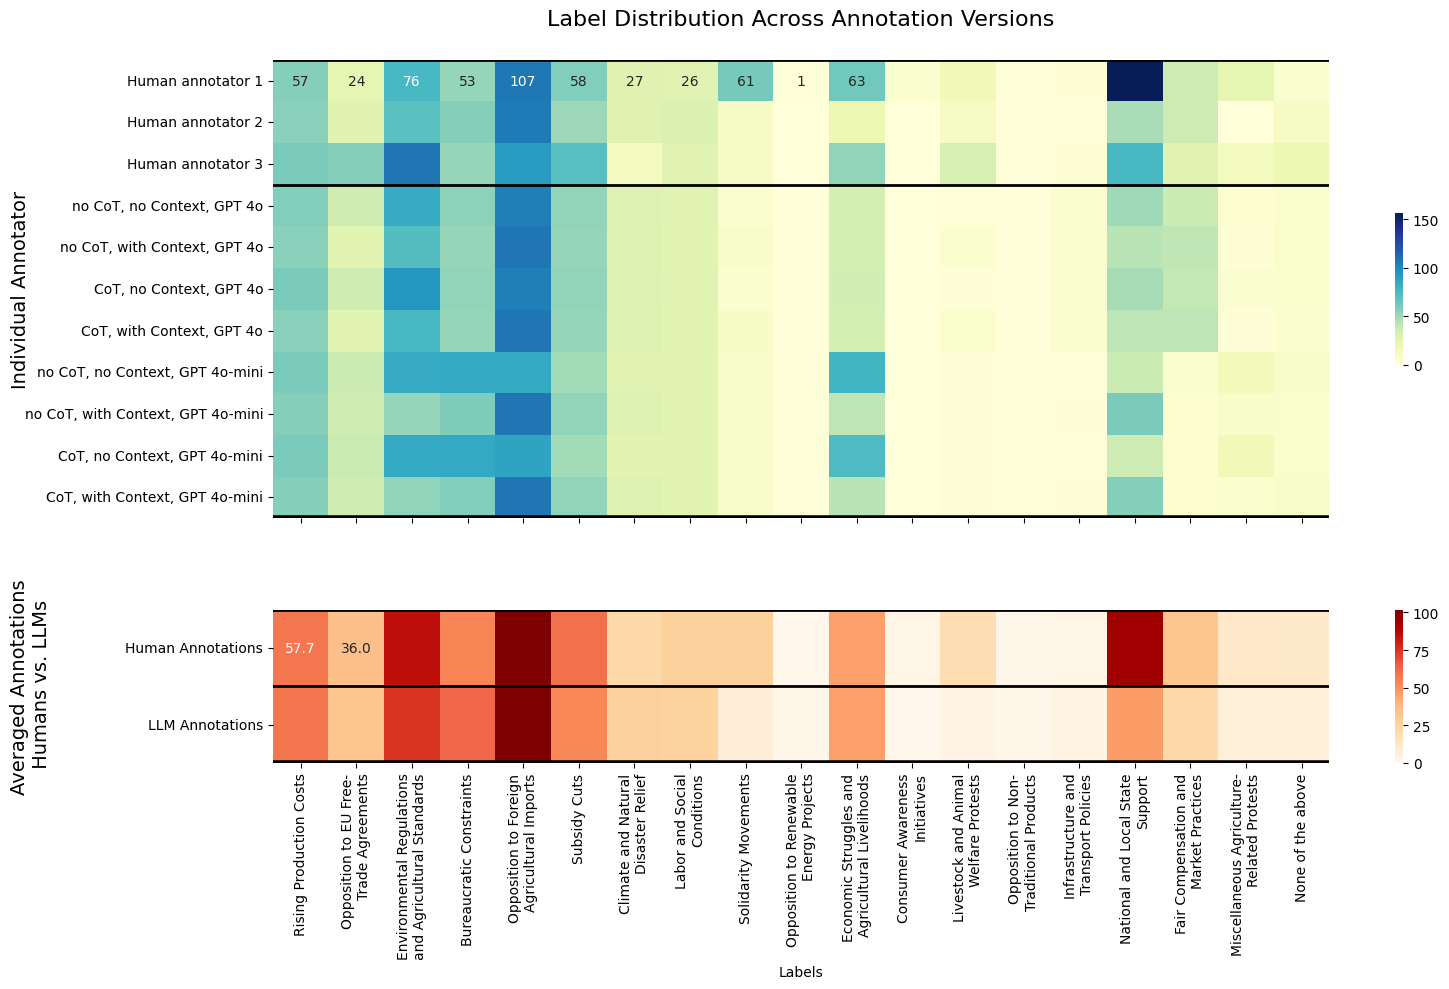

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import textwrap

# # Function to wrap text after every 3 words
# def wrap_after_n_words(text, n=3):
#     words = text.replace('-', ' - ').split()  # Replace hyphen with space-hyphen-space for separation
#     wrapped_lines = [' '.join(words[i:i + n]) for i in range(0, len(words), n)]  # Join every n words
#     return '\n'.join(wrapped_lines)  # Join the lines with newline character

# # Apply the function to wrap the column names
# wrapped_columns = [wrap_after_n_words(col, n=3) for col in df.columns]

wrapped_columns = [ '\n'.join(textwrap.wrap(col, width=26)) for col in df.columns ]


# Set up the subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(16, 10), gridspec_kw={'height_ratios': [3, 1]}, sharex=True,)

#  Plot the first heatmap (df_column_sums)
sns.heatmap(df_column_sums, annot=True, cmap="YlGnBu", fmt='g', ax=ax1, cbar_kws={'shrink': 0.33})

# Add horizontal lines
ax1.axhline(y=3, color='k', linewidth=2)
ax1.axhline(y=0, color='k', linewidth=2)
ax1.axhline(y=11, color='k', linewidth=4)

# Labels and title for the first plot
ax1.set_ylabel("Individual Annotator", fontsize=14)
ax1.set_title("Label Distribution Across Annotation Versions", fontsize=16, pad=25)
ax1.tick_params(axis='y', rotation=0)
ax1.yaxis.set_label_coords(-0.23, 0.5)

# Plot the second heatmap (df_means)
sns.heatmap(df_means, annot=True, cmap="OrRd", fmt='.1f', ax=ax2)

# Labels and title for the second plot
ax2.set_xlabel("Labels")
ax2.set_ylabel("Averaged Annotations\n Humans vs. LLMs", fontsize=14)
ax2.tick_params(axis='y', rotation=0)
ax2.yaxis.set_label_coords(-0.21, 0.5)  # Adjust x and y coordinates for left alignment

# Add horizontal lines
ax2.axhline(y=1, color='k', linewidth=2)
ax2.axhline(y=0, color='k', linewidth=2)
ax2.axhline(y=2, color='k', linewidth=4)


ax2.set_xticklabels(wrapped_columns, rotation=90, ha='right', va='center', rotation_mode='anchor')

# Display the combined plot
plt.tight_layout()

plt.subplots_adjust(hspace=0.3)
# plt.savefig('../img/label_distributions.png', dpi=300, bbox_inches='tight')

plt.show()




## Total label assignments

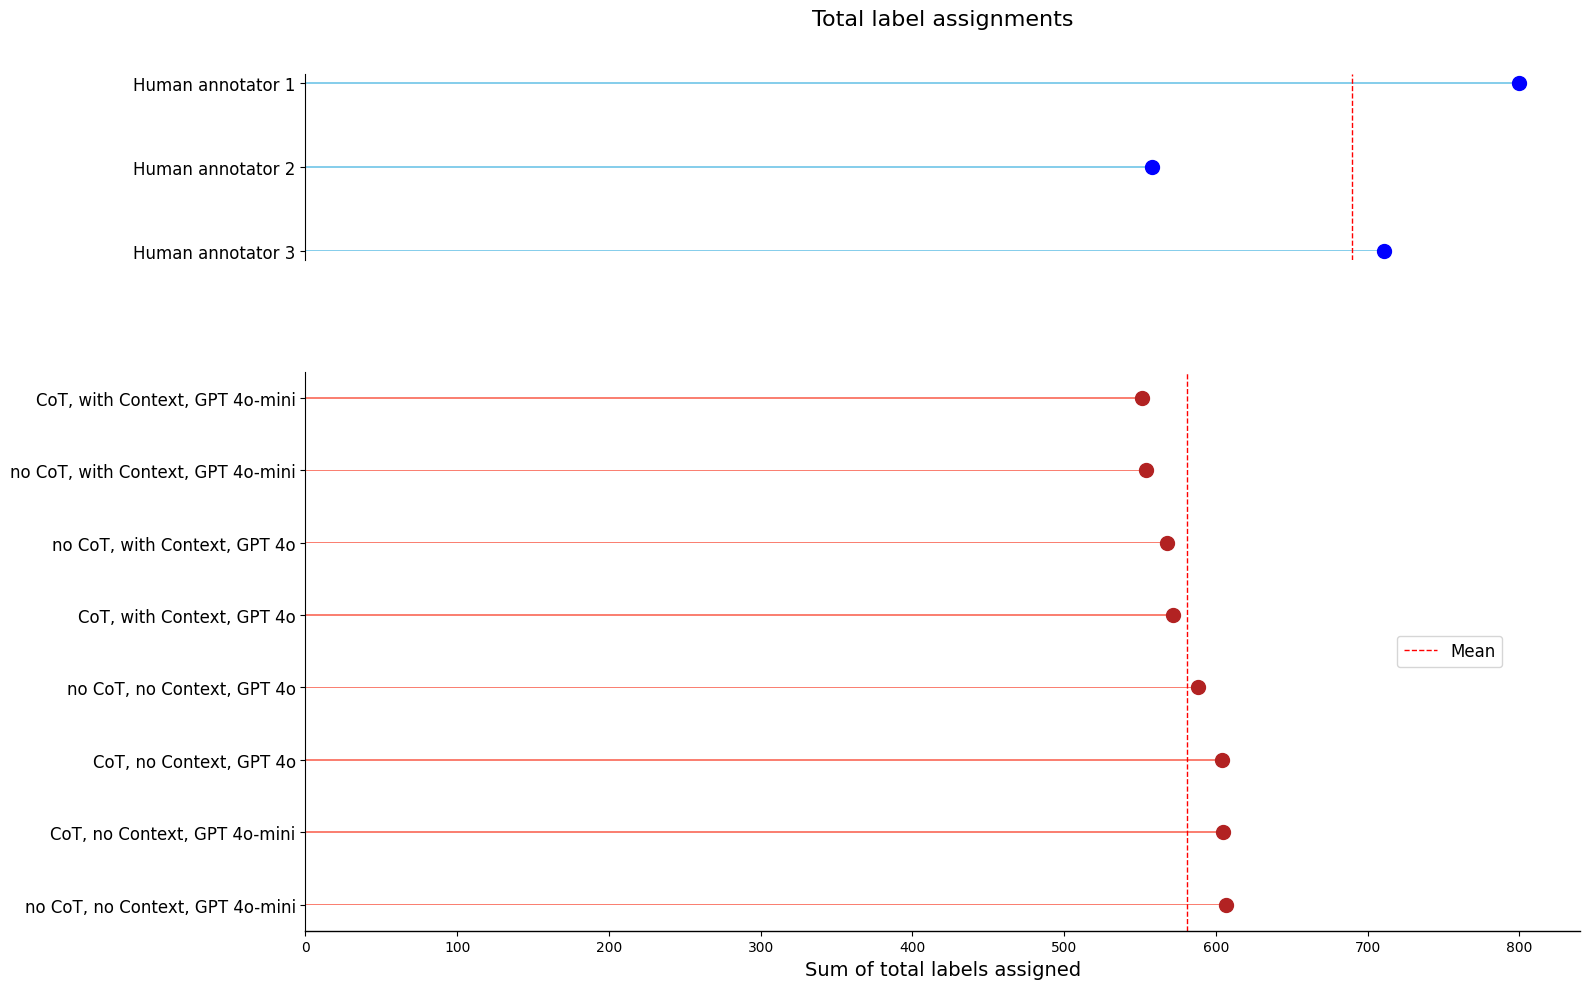

In [23]:
import numpy as np

sums_ra = df_column_sums.loc['Human annotator 1':'Human annotator 3'].sum(axis=1).iloc[::-1]
sums_gpt = df_column_sums[df_column_sums.index.str.contains("GPT")].sum(axis=1).sort_values(ascending=False)


# Create horizontal bar graph subplots
fig, axes = plt.subplots(2, 1, figsize=(16, 10), gridspec_kw={'height_ratios': [1, 3]}, sharex=True,)

# Plotting the first subplot for RA_Andri to RA_Andrea


y_pos_ra = np.arange(len(sums_ra))  # positions for y-axis

axes[0].barh(y_pos_ra, sums_ra, color='skyblue', height=0.02)
axes[0].scatter(sums_ra, y_pos_ra, color='blue', s=100, zorder=3)
axes[0].set_yticks(y_pos_ra)
axes[0].set_yticklabels(sums_ra.index, fontsize=12)

# Remove unnecessary spines
axes[0].spines['top'].set_visible(False)    # Hide the top spine
axes[0].spines['right'].set_visible(False)  # Hide the right spine
axes[0].spines['left'].set_visible(1)   # Hide the left spine
axes[0].spines['bottom'].set_linewidth(False)   # Set the x-axis line width
axes[0].tick_params(left=True, bottom=False, labelleft=True, labelbottom=False)

# Calculate and plot the mean line
mean_ra = sums_ra.mean()
axes[0].axvline(mean_ra, color='red', linestyle='--', linewidth=1, label='Mean')
# axes[0].legend(loc='upper right')

axes[0].set_title("Total label assignments", pad=35, fontsize=16)

# Plotting the second subplot for GPT values
y_pos_gpt = np.arange(len(sums_gpt))  # positions for y-axis

axes[1].barh(y_pos_gpt, sums_gpt, color='salmon', height=0.02)
axes[1].scatter(sums_gpt, y_pos_gpt, color='firebrick', s=100, zorder=3)
axes[1].set_yticks(y_pos_gpt)
axes[1].set_yticklabels(sums_gpt.index, fontsize=12)  # Increase y-tick label size
axes[1].set_xlabel('Count')

# Remove unnecessary spines
axes[1].spines['top'].set_visible(False)    # Hide the top spine
axes[1].spines['right'].set_visible(False)  # Hide the right spine
axes[1].spines['left'].set_visible(1)   # Hide the left spine
axes[1].spines['bottom'].set_linewidth(1)   # Set the x-axis line width


# Calculate and plot the mean line
mean_gpt = sums_gpt.mean()
axes[1].axvline(mean_gpt, color='red', linestyle='--', linewidth=1, label='Mean')
axes[1].legend(loc='center left', bbox_to_anchor=(0.85, 0.5), fontsize=12)


axes[1].set_xlabel('Sum of total labels assigned', fontsize=14)

# Layout adjustment
plt.tight_layout()

plt.subplots_adjust(hspace=0.3)
# plt.savefig('../img/total_label_sum.png', dpi=300, bbox_inches='tight')

plt.show()


**Hamming Loss**

https://mmuratarat.github.io/2020-01-25/multilabel_classification_metrics

It reports how many times on average, the relevance of an example to a class label is incorrectly predicted. Therefore, hamming loss takes into account the prediction error (an incorrect label is predicted) and missing error (a relevant label not predicted), normalized over total number of classes and total number of examples.

Hamming Loss=1nL∑i=1n∑j=1LI(yji≠y^ji)

where I
 is the indicator function. Ideally, we would expect the hamming loss to be 0, which would imply no error; practically the smaller the value of hamming loss, the better the performance of the learning algorithm.

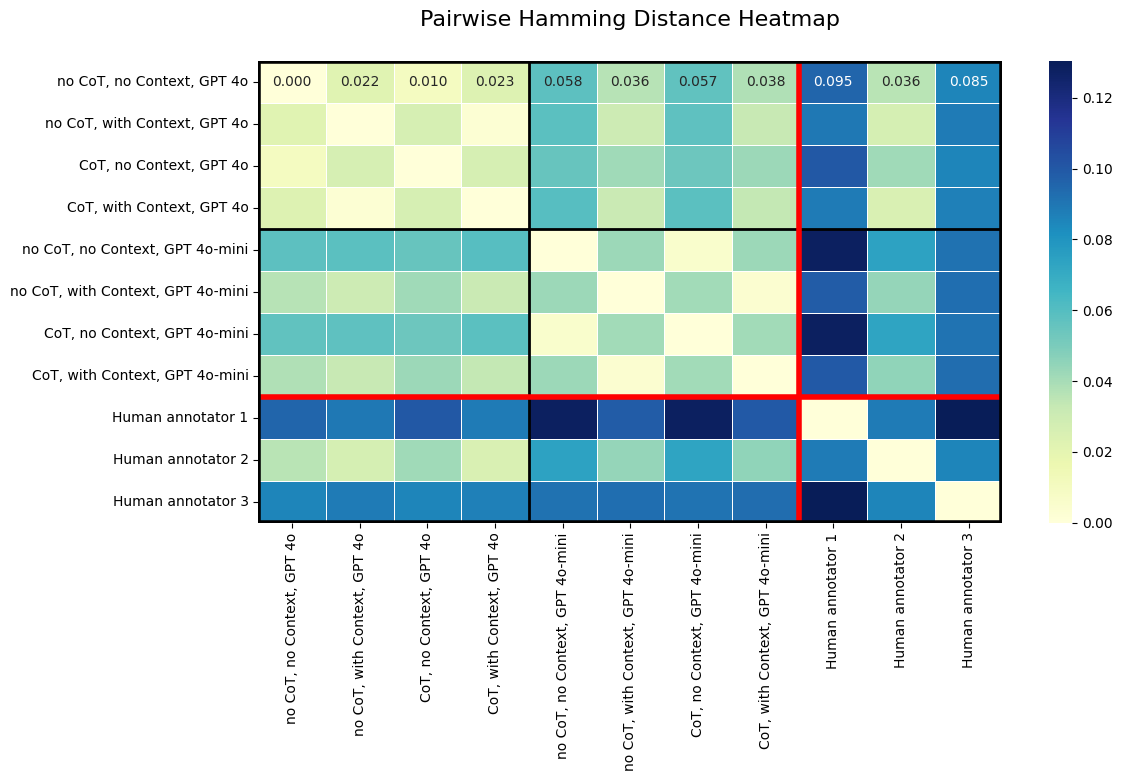

In [25]:
import numpy as np
import pandas as pd
from itertools import combinations

def Hamming_Loss(y_true, y_pred):
    # Count the number of misclassified labels
    temp = 0
    for i in range(y_true.shape[0]):
        temp += np.count_nonzero(y_true[i] != y_pred[i])  # Count differences
    return temp / (y_true.shape[0] * y_true.shape[1])  # Return average loss



def Normalized_Hamming_Distance(y_true, y_pred):
    # Ensure the input arrays are the same shape
    if y_true.shape != y_pred.shape:
        raise ValueError("Input arrays must have the same shape.")

    # Calculate the Hamming distance
    distance = np.sum(y_true != y_pred)  # Count positions where they differ

    # Normalize by the total number of comparisons (total labels)
    total_comparisons = y_true.shape[0] * y_true.shape[1]
    normalized_distance = distance / total_comparisons

    return normalized_distance


def compute_pairwise_hamming_losses(df_results_dict):
    # Get all keys from the dictionary
    keys = list(df_results_dict.keys())

    # Initialize a matrix to store Hamming losses
    hamming_loss_matrix = np.zeros((len(keys), len(keys)))

    # Iterate through all combinations of DataFrames
    for i, (key1, key2) in enumerate(combinations(keys, 2)):
        # Get the DataFrames from the dictionary
        y_true = df_results_dict[key1].values  # Assuming DataFrame holds true values
        y_pred = df_results_dict[key2].values  # Assuming DataFrame holds predicted values

        # Calculate Hamming loss and populate the matrix
        loss = Normalized_Hamming_Distance(y_true, y_pred)

        # Find indices of the keys
        idx1 = keys.index(key1)
        idx2 = keys.index(key2)

        # Populate the matrix
        hamming_loss_matrix[idx1, idx2] = loss
        hamming_loss_matrix[idx2, idx1] = loss  # Symmetric entry

    # Set diagonal to zero
    np.fill_diagonal(hamming_loss_matrix, 0)

    # Convert to a DataFrame for better readability
    hamming_loss_df = pd.DataFrame(hamming_loss_matrix, index=keys, columns=keys)
    return hamming_loss_df


hamming_loss_matrix = compute_pairwise_hamming_losses(df_results_dict)
# Create a heatmap of the Hamming loss matrix
plt.figure(figsize=(12, 6))
sns.heatmap(hamming_loss_matrix, annot=True, cmap='YlGnBu', fmt=".3f", linewidths=.5)


plt.axhline(y=4, color='black', linewidth=2)
plt.axvline(x=4, color='black', linewidth=2)

plt.axhline(y=8, color='red', linewidth=4)
plt.axvline(x=8, color='red', linewidth=4)



plt.axvline(x=0, color='black', linewidth=4)
plt.axvline(x=11, color='black', linewidth=4)

plt.axhline(y=0, color='black', linewidth=4)
plt.axhline(y=11, color='black', linewidth=4)


plt.title("Pairwise Hamming Distance Heatmap", fontsize=16, pad=25)
# plt.savefig('../img/pairwise_hamming_distance.png', dpi=300, bbox_inches='tight')

plt.show()


In [26]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from itertools import product
from sklearn.metrics import precision_score, recall_score, f1_score, jaccard_score

# Specify RA and GPT model names
ra_models = df_column_sums.index[:3]
gpt_models = df_column_sums.index[3:]

def compute_pairwise_scores(df_results_dict, ra_models, gpt_models, score_function):
    # Initialize a matrix to store scores
    score_matrix = np.zeros((len(ra_models), len(gpt_models)))

    # Iterate through each combination of RA and GPT models
    for i, ra_model in enumerate(ra_models):
        y_true = df_results_dict[ra_model].values.flatten()  # Flatten true values
        for j, gpt_model in enumerate(gpt_models):
            y_pred = df_results_dict[gpt_model].values.flatten()  # Flatten predicted values

            # Calculate score
            score = score_function(y_true, y_pred)
            score_matrix[i, j] = score  # Populate the matrix

    # Convert to a DataFrame for better readability
    score_df = pd.DataFrame(score_matrix, index=ra_models, columns=gpt_models)
    score_df.loc["Mean Score",:] = score_df.mean()

    return score_df

# Calculate precision, recall, and F1 score matrices
precision_matrix = compute_pairwise_scores(df_results_dict, ra_models, gpt_models, precision_score)
recall_matrix = compute_pairwise_scores(df_results_dict, ra_models, gpt_models, recall_score)
f1_matrix = compute_pairwise_scores(df_results_dict, ra_models, gpt_models, f1_score)


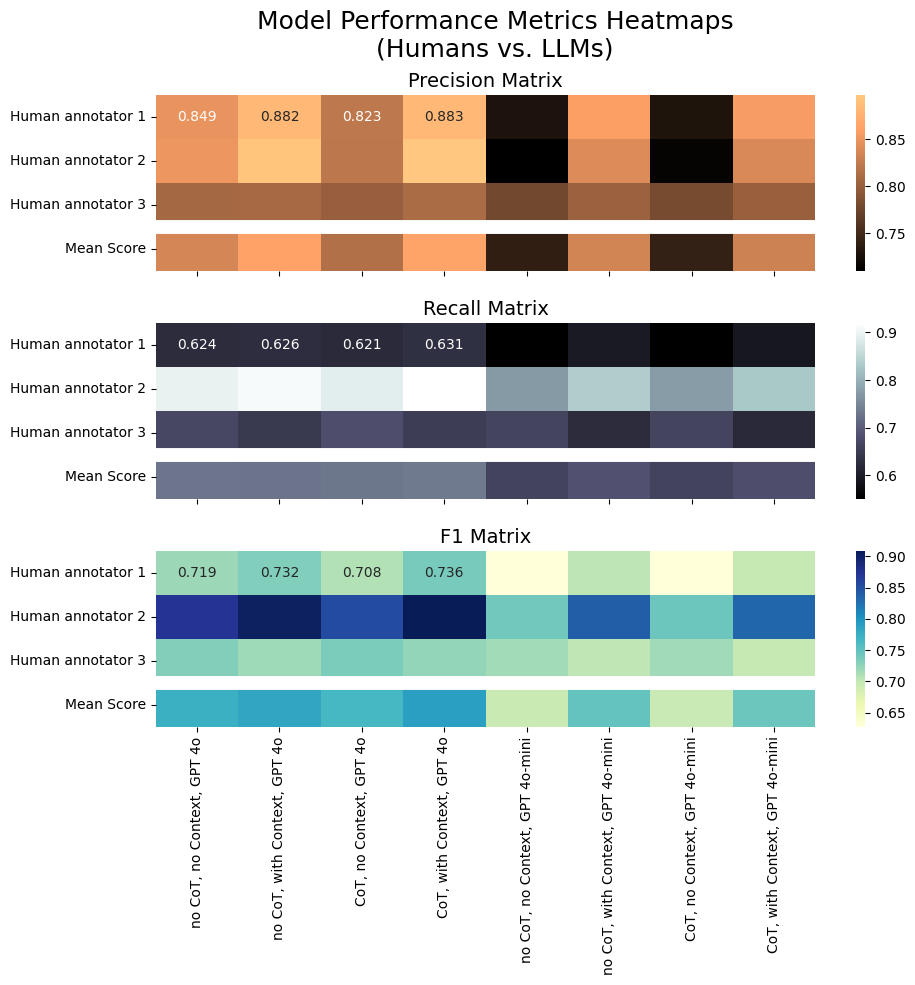

In [27]:
# Set up the subplots
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(10, 10), sharex=True)

fig.suptitle('Model Performance Metrics Heatmaps\n(Humans vs. LLMs)', fontsize=18)  # Set the main title

#  Plot the first heatmap (df_column_sums)
sns.heatmap(precision_matrix, annot=True, cmap="copper", fmt='.3f', ax=ax1)
ax1.axhline(y=3, color='white', linewidth=10)
ax1.set_title('Precision Matrix', fontsize=14)  # Add title for the first subplot


# Plot the second heatmap (df_means)
sns.heatmap(recall_matrix, annot=True, cmap="bone", fmt='.3f', ax=ax2)
ax2.axhline(y=3, color='white', linewidth=10)
ax2.set_title('Recall Matrix', fontsize=14)  # Add title for the first subplot


# Plot the second heatmap (df_means)
sns.heatmap(f1_matrix, annot=True, cmap="YlGnBu", fmt='.3f', ax=ax3)
ax3.axhline(y=3, color='white', linewidth=10)
ax3.set_title('F1 Matrix', fontsize=14)  # Add title for the first subplot




# Display the combined plot
plt.tight_layout()

plt.subplots_adjust(hspace=0.3)
# fig.savefig('../img/recall_precision_f1.png', dpi=300, bbox_inches='tight')
plt.show()



# Confusion matrix

In [27]:
labels

['Rising Production Costs',
 'Opposition to EU Free-Trade Agreements',
 'Environmental Regulations and Agricultural Standards',
 'Bureaucratic Constraints',
 'Opposition to Foreign Agricultural Imports',
 'Subsidy Cuts',
 'Climate and Natural Disaster Relief',
 'Labor and Social Conditions',
 'Solidarity Movements',
 'Opposition to Renewable Energy Projects',
 'Economic Struggles and Agricultural Livelihoods',
 'Consumer Awareness Initiatives',
 'Livestock and Animal Welfare Protests',
 'Opposition to Non-Traditional Products',
 'Infrastructure and Transport Policies',
 'National and Local State Support',
 'Fair Compensation and Market Practices',
 'Miscellaneous Agriculture-Related Protests',
 'None of the above']

In [29]:
import base64
from io import BytesIO
import matplotlib.gridspec as gridspec
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import multilabel_confusion_matrix

# Calculate the confusion matrices for each human annotator
cm1 = multilabel_confusion_matrix(
    df_results_dict["CoT, with Context, GPT 4o"],
    df_results_dict["Human annotator 1"]
)

cm2 = multilabel_confusion_matrix(
    df_results_dict["CoT, with Context, GPT 4o"],
    df_results_dict["Human annotator 2"]
)

cm3 = multilabel_confusion_matrix(
    df_results_dict["CoT, with Context, GPT 4o"],
    df_results_dict["Human annotator 3"]
)

num_reasons = len(cm1)

# Calculate the average confusion matrices
avg_cm = [np.mean([cm1[i], cm2[i], cm3[i]], axis=0) for i in range(num_reasons)]
# Create separate plots for each confusion matrix with custom layout
html_content = '''
<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <title>Confusion Matrices</title>
    <style>
        body { font-family: Arial, sans-serif; }
        .tab {
            display: none;
        }
        .tab-header {
            cursor: pointer;
            padding: 10px;
            background-color: #f1f1f1;
            border: 1px solid #ccc;
            display: inline-block;
            margin-right: 5px;
        }
        .tab-content {
            border: 1px solid #ccc;
            padding: 10px;
        }
        .active {
            display: block;
        }
    </style>
</head>
<body>

<h2>Confusion Matrices</h2>

<div id="tab-headers">
'''

# Create tab headers
for i in range(num_reasons):
    html_content += f'<div class="tab-header" onclick="openTab({i})">{labels[i]}</div>\n'

html_content += '</div>'

# Create tab content
for i in range(num_reasons):
    # Create a figure with the custom layout
    fig = plt.figure(figsize=(12, 3))
    gs = gridspec.GridSpec(1, 5)

    # Plot confusion matrix 1
    ax1 = plt.subplot(gs[0, 0])
    sns.heatmap(cm1[i], annot=True, fmt="d", cmap='gray_r', vmin=0, vmax=0, cbar=False, linewidths=1, linecolor='k', ax=ax1)
    ax1.set_title("Confusion Matrix\nHuman annotator 1")
    ax1.set_xlabel("LLM")
    ax1.set_ylabel("Human")

    # Plot confusion matrix 2
    ax2 = plt.subplot(gs[0, 1])
    sns.heatmap(cm2[i], annot=True, fmt="d", cmap='gray_r', vmin=0, vmax=0, cbar=False, linewidths=1, linecolor='k', ax=ax2)
    ax2.set_title("Confusion Matrix\nHuman annotator 2")
    ax2.set_xlabel("LLM")
    ax2.set_ylabel("Human")

    # Plot confusion matrix 3
    ax3 = plt.subplot(gs[0, 2])
    sns.heatmap(cm3[i], annot=True, fmt="d", cmap='gray_r', vmin=0, vmax=0, cbar=False, linewidths=1, linecolor='k', ax=ax3)
    ax3.set_title("Confusion Matrix\nHuman annotator 3")
    ax3.set_xlabel("LLM")
    ax3.set_ylabel("Human")

    # Plot average confusion matrix centered in the second row
    ax4 = plt.subplot(gs[0, 4])
    sns.heatmap(avg_cm[i], annot=True, fmt=".2f", cmap='gray_r', vmin=0, vmax=0, cbar=False, linewidths=1, linecolor='k', ax=ax4)
    ax4.set_title("Confusion Matrix\n Average Human vs. LLM")
    ax4.set_xlabel("LLM")
    ax4.set_ylabel("Human")

    # Save the figure to a BytesIO object
    buffer = BytesIO()
    plt.tight_layout()
    fig.savefig(buffer, format="png")
    buffer.seek(0)

    # Encode the image as Base64
    img_base64 = base64.b64encode(buffer.read()).decode('utf-8')

    # Add the image to the HTML content
    html_content += f'''
    <div id="tab-{i}" class="tab tab-content">
        <h3>Reason: {labels[i]}</h3>
        <img src="data:image/png;base64,{img_base64}" alt="Confusion Matrix for {labels[i]}">
    </div>
    '''

    plt.close()  # Close the figure

html_content += '''
</div>

<script>
function openTab(index) {
    var tabs = document.getElementsByClassName('tab');
    for (var i = 0; i < tabs.length; i++) {
        tabs[i].style.display = 'none'; // Hide all tabs
    }
    document.getElementById('tab-' + index).style.display = 'block'; // Show the selected tab
}

// Open the first tab by default
openTab(0);
</script>

<p><strong>Note:</strong> 215 total instances classified. The confusion matrices compare human annotations to GPT-4o with Chain-of-Thought prompting and the provision of label descriptions.</p>

</body>
</html>
'''

# Save the HTML content to a file in the output directory
#html_file_path = f"../img/confusion_matrices_standalone.html"
#with open(html_file_path, 'w') as f:
#    f.write(html_content)
#
#print("Standalone HTML file with embedded confusion matrices has been created successfully in:", html_file_path)


Standalone HTML file with embedded confusion matrices has been created successfully in: ../img/confusion_matrices_standalone.html


# Run best model on full dataset

In [ ]:
# final_res = annotate_gpt(event_descriptions=event_descriptions,
#                           system_prompt=system_prompt_variations['CoT_context'],
#                           gpt_model="gpt-4o")

In [ ]:
# content_res_gpt_4o_cot_con = make_df_from_gpt(labels, final_res)
# content_res_gpt_4o_cot_con.to_csv('../data/content_res_gpt_4o_cot_con.csv', index=False)
